In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv1D, MaxPool2D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import pandas as pd
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = np.load('/content/drive/My Drive/test_colab/dataset_2_char_cat_45000_15000_140.npy')

In [0]:
X, Y = data[:, 1:], data[:, 0]
X_train, X_test, Y_train0, Y_test0 = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=11)
# print(X_train.shape, Y_train0.shape)
# print(X_test.shape, Y_test0.shape)

In [5]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train0)
Y_test = to_categorical(Y_test0)
Y_train.shape

(42000, 2)

In [6]:
# Build CNN
cnn_input = Input((X_train.shape[1],))
H = Reshape((100, 140, 1))(cnn_input)

H = Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu')(H)
H = MaxPool2D((2,2))(H)

H = Conv2D(filters=64, kernel_size=(2, 2), padding='same', activation='relu')(H)
H = MaxPool2D((2,2))(H)

H = Flatten()(H)
H = Dense(4, activation = 'relu')(H)

cnn_output = Dense(2, activation = 'softmax')(H)

cnn_model = Model(cnn_input,cnn_output)
cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14000)]           0         
_________________________________________________________________
reshape (Reshape)            (None, 100, 140, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 140, 32)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 70, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 70, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 56000)             0     

In [0]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
cnn_model.fit(X_train, Y_train, epochs=20, batch_size=512, verbose=2)

Epoch 1/20
42000/42000 - 22s - loss: 0.2850 - acc: 0.8771
Epoch 2/20
42000/42000 - 18s - loss: 0.1878 - acc: 0.9251
Epoch 3/20
42000/42000 - 18s - loss: 0.1732 - acc: 0.9320
Epoch 4/20
42000/42000 - 17s - loss: 0.1591 - acc: 0.9382
Epoch 5/20
42000/42000 - 17s - loss: 0.1526 - acc: 0.9414
Epoch 6/20
42000/42000 - 17s - loss: 0.1477 - acc: 0.9440
Epoch 7/20
42000/42000 - 17s - loss: 0.1434 - acc: 0.9449
Epoch 8/20
42000/42000 - 17s - loss: 0.1336 - acc: 0.9501
Epoch 9/20
42000/42000 - 17s - loss: 0.1288 - acc: 0.9519
Epoch 10/20
42000/42000 - 17s - loss: 0.1365 - acc: 0.9487
Epoch 11/20
42000/42000 - 17s - loss: 0.1238 - acc: 0.9536
Epoch 12/20
42000/42000 - 17s - loss: 0.1236 - acc: 0.9539
Epoch 13/20
42000/42000 - 17s - loss: 0.1187 - acc: 0.9554
Epoch 14/20
42000/42000 - 17s - loss: 0.1096 - acc: 0.9604
Epoch 15/20
42000/42000 - 18s - loss: 0.1141 - acc: 0.9576
Epoch 16/20
42000/42000 - 18s - loss: 0.1052 - acc: 0.9616
Epoch 17/20
42000/42000 - 17s - loss: 0.1027 - acc: 0.9623
Epoch 

In [9]:
score = cnn_model.evaluate(X_test, Y_test, batch_size=512)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

18000/18000 [==============================] - 4s 238us/sample - loss: 0.1815 - acc: 0.9328
Test loss: 0.18148150698343912
Test accuracy: 0.9328333


In [10]:
y_pred_model = cnn_model.predict(X_test.astype("float"))
y_pred_model
y_pred = np.where(y_pred_model > 0.5, 1, 0)
y_pred
print(classification_report(Y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.97      0.94      0.95     13546
     class 1       0.83      0.92      0.87      4454

   micro avg       0.93      0.93      0.93     18000
   macro avg       0.90      0.93      0.91     18000
weighted avg       0.94      0.93      0.93     18000
 samples avg       0.93      0.93      0.93     18000



In [0]:
def func2():
  cnn_input = Input((X_train.shape[1],))
  H = Reshape((100, 140, 1))(cnn_input)

  H = Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu')(H)
  H = MaxPool2D((2,2))(H)

  H = Conv2D(filters=64, kernel_size=(2, 2), padding='same', activation='relu')(H)
  H = MaxPool2D((2,2))(H)
  
  H = Flatten()(H)
  H = Dense(4, activation = 'relu')(H)

  cnn_output = Dense(2, activation = 'softmax')(H)

  cnn_model = Model(cnn_input,cnn_output)
  
  cnn_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  
  return cnn_model

In [0]:
cnn = KerasClassifier(build_fn=func2, epochs=10, batch_size=10, verbose=0)
recall_cnn = cross_val_score(cnn, X_train, Y_train0, cv=10, scoring='recall')


In [13]:
recall_cnn

array([0.87453184, 0.86226415, 0.89285714, 0.83870968, 0.89353612,
       0.89146568, 0.86704653, 0.8894052 , 0.91471415, 0.86407767])

In [0]:
recall_cnn = pd.DataFrame({'CNN' : recall_cnn})

In [0]:
recall = pd.read_csv('/content/drive/My Drive/test_colab/model_recall_score.csv')

In [0]:
recall.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
df = pd.concat([recall, recall_cnn], axis=1)
df

,LogisticRegression,Multinomial Naive Bayes,Decision tree,Random Forest,Gradient Boosting,XGBooster,SVC,MLP,CNN
0,0.604385,0.748332,0.527169,0.865586,0.768351,0.657769,0.656816,0.604459,0.874532
1,0.608198,0.752145,0.536702,0.838894,0.761678,0.684461,0.586273,0.656040,0.862264
2,0.556721,0.755005,0.542421,0.846520,0.759771,0.678742,0.606292,0.690517,0.892857
3,0.610105,0.737846,0.503337,0.839847,0.771211,0.665396,0.692088,0.572720,0.838710
4,0.656816,0.749285,0.559581,0.867493,0.778837,0.697807,0.521449,0.476071,0.893536
5,0.625357,0.746425,0.534795,0.857960,0.785510,0.689228,0.641563,0.616071,0.891466
6,0.603432,0.743565,0.516683,0.860820,0.776930,0.681602,0.428027,0.574539,0.867047
7,0.606292,0.739752,0.486177,0.838894,0.750238,0.667302,0.432793,0.460000,0.889405
8,0.586273,0.765491,0.562440,0.852240,0.770257,0.662536,0.359390,0.400636,0.914714
9,0.629171,0.750238,0.528122,0.875119,0.781697,0.689228,0.563394,0.580992,0.864078


In [0]:
df.to_csv('/content/drive/My Drive/test_colab/model_recall_score.csv')

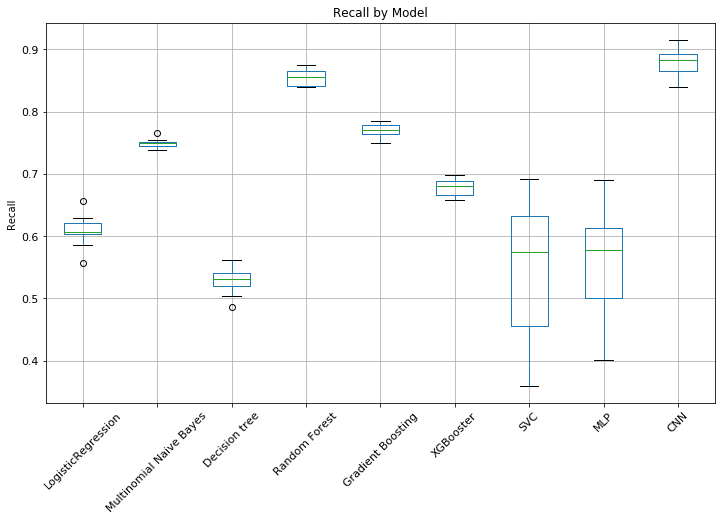

In [21]:
## boxplot
plt.figure(figsize=(12, 7))
df.boxplot(column= ['LogisticRegression', 'Multinomial Naive Bayes', 'Decision tree', 'Random Forest', 'Gradient Boosting', 'XGBooster', 'SVC', 'MLP', 'CNN']) 
plt.xticks(size = 11, rotation=45)
plt.yticks(size = 11)
plt.title('Recall by Model')
plt.ylabel("Recall")
plt.show()